[ZHAW Exercise Week 4 Linear Regression with tensorflow](https://github.com/toelt-llc/COURSE-zhaw-dlcourse-spring2019/blob/master/Week%204%20-%20One%20Neuron/Week%204%20-%20Linear%20Regression%20with%20Tensor%20Flow.ipynb)

In [114]:
def compare_mse(sess, y_, train_x, test_x, kp):
    if (kp < 1):
        pred_y = sess.run(y_, feed_dict = {X:test_x, keep_prob:kp})
        mse = tf.reduce_mean(tf.square(pred_y - test_y))
        print("MSE Test: %.4f" % sess.run(mse))

        pred_y = sess.run(y_, feed_dict = {X:train_x, keep_prob:kp})
        mse = tf.reduce_mean(tf.square(pred_y - train_y))
        print("MSE Train: %.4f" % sess.run(mse))
    else:
        pred_y = sess.run(y_, feed_dict = {X:test_x})
        mse = tf.reduce_mean(tf.square(pred_y - test_y))
        print("MSE Test: %.4f" % sess.run(mse))

        pred_y = sess.run(y_, feed_dict = {X:train_x})
        mse = tf.reduce_mean(tf.square(pred_y - train_y))
        print("MSE Train: %.4f" % sess.run(mse))

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

import numpy as np

import sklearn.linear_model as sk

In [116]:
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()
features = np.array(train_data)
labels = np.array(train_targets)

In [117]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [118]:
def normalize(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.std(dataset, axis = 0)
    return (dataset-mu)/sigma

In [119]:
n_training_samples = features.shape[0]
n_dim = features.shape[1]

print('The dataset has',n_training_samples,'training samples.')
print('The dataset has',n_dim,'features.')

The dataset has 404 training samples.
The dataset has 13 features.


In [120]:
features_norm = normalize(features)

In [121]:
print(features_norm.shape)
print(labels.shape)

(404, 13)
(404,)


In [122]:
np.random.seed(42)
rnd = np.random.rand(len(features_norm)) < 0.8

train_x = np.transpose(features_norm[rnd])
train_y = np.transpose(labels[rnd])
test_x = np.transpose(features_norm[~rnd])
test_y = np.transpose(labels[~rnd])

print(train_x.shape)
print(train_y.shape)

(13, 321)
(321,)


In [123]:
np.random.seed(42)
rnd = np.random.rand(len(features_norm)) < 0.8

train_x = np.transpose(features_norm[rnd])
train_y = np.transpose(labels[rnd])
test_x = np.transpose(features_norm[~rnd])
test_y = np.transpose(labels[~rnd])

print(train_x.shape)
print(train_y.shape)

(13, 321)
(321,)


In [124]:
train_y = train_y.reshape(1,len(train_y))
test_y = test_y.reshape(1,len(test_y))

print(train_y.shape)
print(test_y.shape)

(1, 321)
(1, 83)


In [125]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

W = tf.Variable(tf.ones([n_dim, 1]))
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

In [126]:
y_ = tf.matmul(tf.transpose(W),X)+b
cost = tf.reduce_mean(tf.square(y_-Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [127]:
def run_linear_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)

    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % 1000 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))

    return sess, cost_history

In [128]:
sess, cost_history = run_linear_model(learning_r = 0.01,
                                training_epochs = 10000,
                                train_obs = train_x,
                                train_labels = train_y,
                                debug = True)

Reached epoch 0 cost J = 607.881653
Reached epoch 1000 cost J = 22.400040
Reached epoch 2000 cost J = 22.344212
Reached epoch 3000 cost J = 22.340260
Reached epoch 4000 cost J = 22.339937
Reached epoch 5000 cost J = 22.339911
Reached epoch 6000 cost J = 22.339909
Reached epoch 7000 cost J = 22.339911
Reached epoch 8000 cost J = 22.339909
Reached epoch 9000 cost J = 22.339909
Reached epoch 10000 cost J = 22.339909


<Figure size 640x480 with 0 Axes>

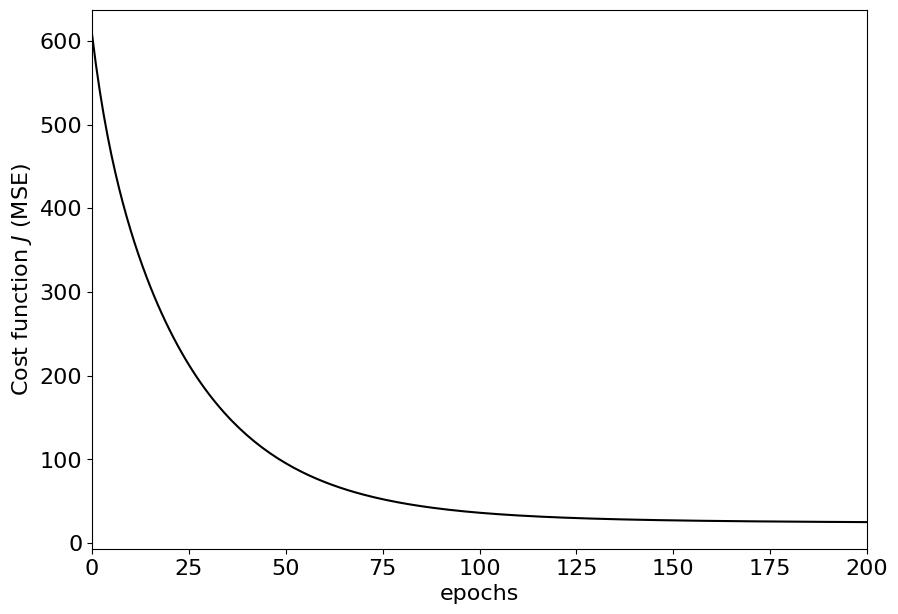

In [129]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, ls='solid', color = 'black')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$ (MSE)', fontsize = 16)
plt.xlim(0,200)
plt.tick_params(labelsize=16)

<Figure size 640x480 with 0 Axes>

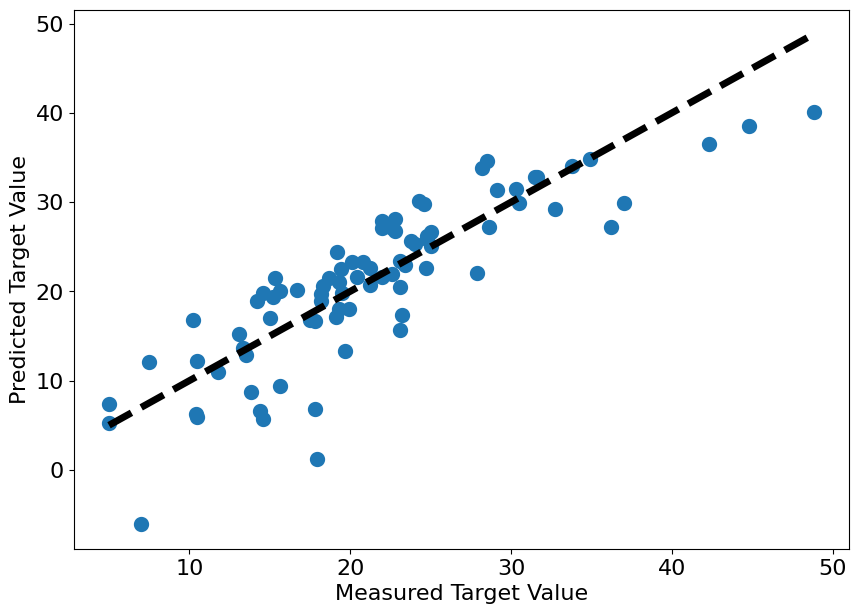

In [130]:
pred_y = sess.run(y_, feed_dict = {X: test_x, Y: test_y})
mse = tf.reduce_mean(tf.square(pred_y - test_y))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(test_y, pred_y, lw = 5)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw = 5)
ax.set_xlabel('Measured Target Value', fontsize = 16)
ax.set_ylabel('Predicted Target Value', fontsize = 16)
plt.tick_params(labelsize=16)

In [131]:
compare_mse(sess, y_, train_x, test_x, 1)

MSE Test: 22.7738
MSE Train: 22.3399


In [132]:
sess.close()

In [133]:
print ('Starting first model')
sess1, cost_history1 = run_linear_model(learning_r = 0.1,
                                training_epochs = 10000,
                                train_obs = train_x,
                                train_labels = train_y,
                                debug = True)

print ('Starting second model')
sess2, cost_history2 = run_linear_model(learning_r = 0.01,
                                training_epochs = 10000,
                                train_obs = train_x,
                                train_labels = train_y,
                                debug = True)

print ('Starting third model')
sess3, cost_history3 = run_linear_model(learning_r = 0.001,
                                training_epochs = 10000,
                                train_obs = train_x,
                                train_labels = train_y,
                                debug = True)

Starting first model
Reached epoch 0 cost J = 370.791046
Reached epoch 1000 cost J = 22.339907
Reached epoch 2000 cost J = 22.339907
Reached epoch 3000 cost J = 22.339907
Reached epoch 4000 cost J = 22.339907
Reached epoch 5000 cost J = 22.339907
Reached epoch 6000 cost J = 22.339907
Reached epoch 7000 cost J = 22.339907
Reached epoch 8000 cost J = 22.339907
Reached epoch 9000 cost J = 22.339907
Reached epoch 10000 cost J = 22.339907
Starting second model
Reached epoch 0 cost J = 607.881653
Reached epoch 1000 cost J = 22.400040
Reached epoch 2000 cost J = 22.344212
Reached epoch 3000 cost J = 22.340260
Reached epoch 4000 cost J = 22.339937
Reached epoch 5000 cost J = 22.339911
Reached epoch 6000 cost J = 22.339909
Reached epoch 7000 cost J = 22.339911
Reached epoch 8000 cost J = 22.339909
Reached epoch 9000 cost J = 22.339909
Reached epoch 10000 cost J = 22.339909
Starting third model
Reached epoch 0 cost J = 645.099854
Reached epoch 1000 cost J = 36.742985
Reached epoch 2000 cost J = 

<Figure size 640x480 with 0 Axes>

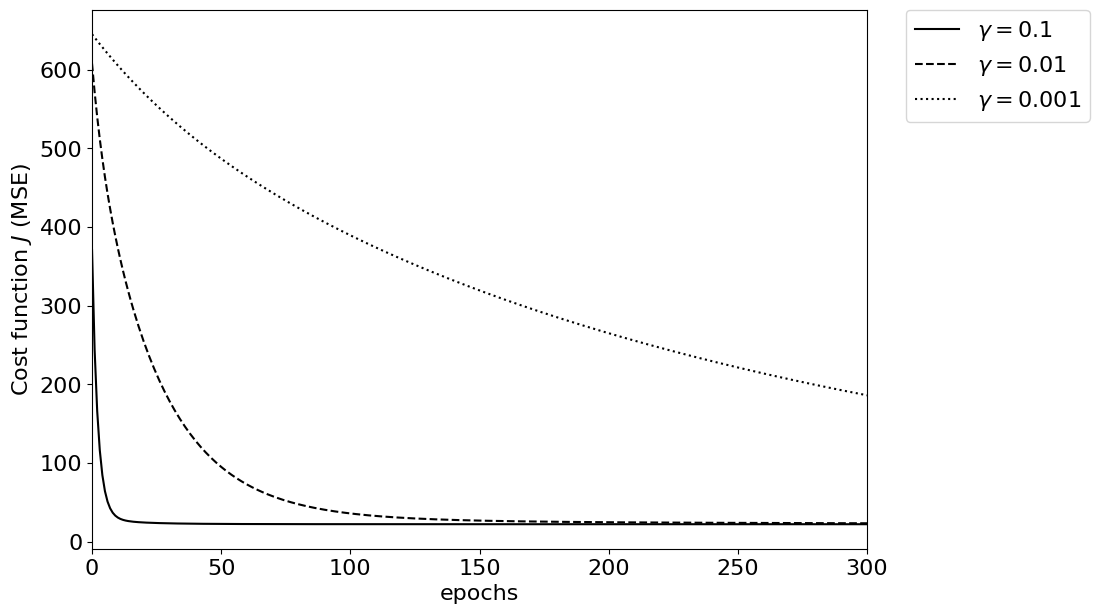

In [134]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history1, ls='solid', color = 'black', label='$\gamma=0.1$')
ax.plot(cost_history2, ls='dashed', color = 'black', label='$\gamma=0.01$')
ax.plot(cost_history3, ls='dotted', color = 'black', label='$\gamma=0.001$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$ (MSE)', fontsize = 16)
plt.xlim(0,300)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

In [135]:
sess1.close()
sess2.close()
sess3.close()

In [136]:
lm = sk.LinearRegression()
lm.fit(np.transpose(train_x), np.transpose(train_y))
msetest = np.mean((np.transpose(test_y)-lm.predict(np.transpose(test_x)))**2)
msetrain = np.mean((np.transpose(train_y)-lm.predict(np.transpose(train_x)))**2)

print('Train MSE=',msetrain)
print('Test MSE=',msetest)

Train MSE= 22.339909177538665
Test MSE= 22.774028286274948
